# 15. Valuation Framework
From **Python for Finance**
Examples from the valuations architecture chapter.

In [1]:
import datetime as dt
# import Valuations

import sys
sys.path.append(".\\Valuations\\")
                
from get_year_deltas import get_year_deltas
from market_environment import market_environment
from constant_short_rate import constant_short_rate

## Get Year Deltas

In [2]:
# Test

dates = [dt.datetime(2015, 1, 1), dt.datetime(2015,7,1), dt.datetime(2016,1,1)]
print(get_year_deltas(dates))

#should return
#[ 0., 0.49589041,  1.]

[ 0.          0.49589041  1.        ]


In [3]:
#testing
import datetime as dt
dates = [dt.datetime(2015, 1, 1), dt.datetime(2015,7,1), dt.datetime(2016,1,1)]
csr = constant_short_rate(name='csr', short_rate=0.05)
print(csr.get_discount_factors(dates))

[[datetime.datetime(2015, 1, 1, 0, 0) 1.0]
 [datetime.datetime(2015, 7, 1, 0, 0) 0.9755103387657228]
 [datetime.datetime(2016, 1, 1, 0, 0) 0.951229424500714]]


In [4]:
deltas = get_year_deltas(dates)
print(csr.get_discount_factors(deltas, dtobjects=False))

[[ 0.          1.        ]
 [ 0.49589041  0.97551034]
 [ 1.          0.95122942]]


In [5]:
#Testing and Example
import datetime as dt
dates = [dt.datetime(2015, 1, 1), dt.datetime(2015, 7, 1), dt.datetime(2016, 1, 1)]
csr = constant_short_rate('csr', 0.05)
me_1 =  market_environment('me_1', dt.datetime(2015, 1, 1))
me_1.add_list('symbols',['AAPL', 'MSFT', 'FB'])

In [6]:
me_1.get_list('symbols')

['AAPL', 'MSFT', 'FB']

In [7]:
me_2 = market_environment('me_2', dt.datetime(2015,1,1))
me_2.add_constant('volatility', 0.2)
me_2.add_curve('short_rate', csr) # add instance of discounting class

In [8]:
me_2.get_curve('short_rate')

In [9]:
me_1.add_environment(me_2) #add complete environment

In [10]:
me_1.get_curve('short_rate')    

In [11]:
me_1.constants

{'volatility': 0.2}

In [12]:
me_1.lists

{'symbols': ['AAPL', 'MSFT', 'FB']}

In [13]:
me_1.curves

{'short_rate': <constant_short_rate.constant_short_rate at 0x14f916c5d68>}

In [14]:
me_1.get_curve('short_rate').short_rate

0.05

Plotting a 10 year, monthly discount curve

In [24]:
from dateutil.relativedelta import relativedelta
dates = []
for i in range(120):
    dates.append(start_date + relativedelta(months=i))

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
discount_factors = csr.get_discount_factors(dates)

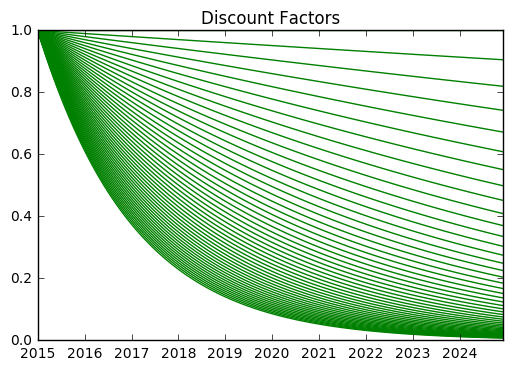

In [65]:
for rate in range(0,50):
    csr.short_rate = rate/100
    discount_factors = csr.get_discount_factors(dates)
    plt.plot(discount_factors[:,0],discount_factors[:,1], color='green')

plt.title("Discount Factors")